# Chapter 07 딥러닝을 시작합니다

## 07-1 인공신경망

### 패션 MNIST
* 7,8장에서 사용할 패션 MNIST 데이터셋은 10종류의 패션 아이템으로 구성

In [ ]:
# 데이터 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


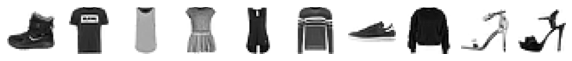

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 데이터 크기 확인
print(train_input.shape, train_target.shape)

print(test_input.shape, test_target.shape)

# 이미지 확인
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

# 타깃값 확인
print([train_target[i] for i in range(10)])

# 레이블 당 샘플 개수 확인
import numpy as np
print(np.unique(train_target, return_counts=True))

### 로지스택 회귀로 패션 아이템 분류하기
* 구분을 위한 10개의 방정식과 파라미터를 찾는다

In [ ]:
# 1차원 배열로 변경
train_scaled = train_input / 255.0     # 정규화
train_scaled = train_scaled.reshape(-1, 28*28)

print(train_scaled.shape)

# 교차 검증
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

(60000, 784)
0.8195666666666668


### 인공 신경망
* 여기서 입력층은 픽셀값, 출력층은 z값

### 텐서플로와 케라스
* 텐서플로의 고수준 API가 케라스

In [ ]:
import tensorflow as tf
from tensorflow import keras

### 인공 신경망으로 모델 만들기
* 인공 신경망에서는 교차 검증을 잘 사용하지 ㅇ낳고 검증 세트를 사용
> 1. 딥러닝은 데이터셋이 충분히 크기 떄문에 검증 점수가 안정적.
> 2. 교차 검증을 수행하기엔 훈련 시간이 너무 오래 걸림.



In [ ]:
# 검증 세트 나누기
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(      # 변수명 바꾸는게 좋아보임
    train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
# 밀집층 만들기
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,)) # 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기

model = keras.Sequential(dense)

### 인공 신경망으로 패션 아이템 분류하기
* 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 원-핫 인코딩 이라고 함.

In [ ]:
# 설정 단계
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

print(train_target[:10])

model.fit(train_scaled, train_target, epochs=5)

model.evaluate(val_scaled, val_target)

# epoch 늘리면 과대적합될까?
model.fit(train_scaled, train_target, epochs=10)

model.evaluate(val_scaled, val_target)

[7 3 5 8 6 9 3 3 9 9]
Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4134 - accuracy: 0.8655
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4118 - accuracy: 0.8664
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4104 - accuracy: 0.8666
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4101 - accuracy: 0.8678
Epoch 5/5
375/375 [==============================] - 1s 1ms/step - loss: 0.4483 - accuracy: 0.8558
Epoch 1/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4088 - accuracy: 0.8677
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4089 - accuracy: 0.8677
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4076 - accuracy: 0.8674
Epoch 4/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4082 - accuracy: 0.8686
Epoch 5/10
1500/1500 [==============================] - 2s 2ms/step

[0.4743116796016693, 0.8498333096504211]

## 07-2 심층 신경망

### 2개의 층

In [ ]:
# 데이터 불러오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

# 스케일링
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# 층 만들기
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

### 심층 신경망 만들기

In [ ]:
# 심층 신경망
model = keras.Sequential([dense1, dense2])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### 층을 추가하는 다른 방법
* Sequential 클래스의 생성자 안에서 바로 Dense 클래스의 객체 만들기
* 층 이름은 영문이어야함

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                       name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

model.summary()

# add() 메서드 활용
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()



Model: "패션 MNIST 모델"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               78500     
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 2ms/step - loss: 0.5594 - accuracy: 0.8094
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4071 - accuracy: 0.8524
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3710 - accuracy: 0.8664
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3490 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3316 - accuracy: 0.8804


### 렐루 함수
* max(0, z)

In [ ]:
# Flatten 클래스
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# reshape 없이
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)


# 컴파일링후 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# 검증세트 테스트
model.evaluate(val_scaled, val_target)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5373 - accuracy: 0.8107
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3972 - accuracy: 0.8575
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3573 - accuracy: 0.8715
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0

[0.3580319285392761, 0.8799999952316284]

### 옵티마이저
* 하이퍼파라미터 : 은닉층 개수, 뉴런 개수, 활성화 함수 선택, 층의 종류, 미니배치 종류, epochs, 등등
* compile() 메서드에서는 케라스의 기본 경사 하강법 알고리즘인 RMSprop을 사용. 이외에도 많은 종류의 경사 하강법 알고리즘을 제공. 이들을 옵티마이저라고 부름.

In [ ]:
# SGD
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')  # sgd 문자열은 이 클래스의 기본 설정 매개변수로 생성한 객체와 동일

# 위의 코드와 동일
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy',
              metrics='accuracy')

# 매개변수 활용
sgd = keras.optimizers.SGD(learning_rate=0.1)

# 네스테로프 모멘텀 최적화
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)  # 모멘텀 최적화를 2번 반복하여 구현

# adagrad
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_entropy',
              metrics='accuracy')

# RMSprop
model.compile(optimizer='rmsprop', loss='sparse_categorical_entropy',
              metrics='accuracy')

In [ ]:
# Adam 클래스로 훈련
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

# 검증 세트
model.evaluate(val_scaled, val_target)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5255 - accuracy: 0.8172
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3891 - accuracy: 0.8591
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3509 - accuracy: 0.8728
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3242 - accuracy: 0.8816
Epoch 5/5
375/375 [==============================] - 1s 2ms/step - loss: 0.3327 - accuracy: 0.8810


[0.33272624015808105, 0.8809999823570251]

## 07-3 신경망 모델 훈련
* 케라스 API를 사용해 모델을 훈련하는데 필요한 다양한 도구들 알아보기

### 손실 곡선
* 케라스의 fit() 메서드는 History 클래스 객체를 반환
* 손실과 정확도 값이 저장되어 있음.

In [1]:
# 데이터 불러오기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

# 모델 만드는 메서드 만들기
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# 모델 구조 출력
model = model_fn()
model.summary()

4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


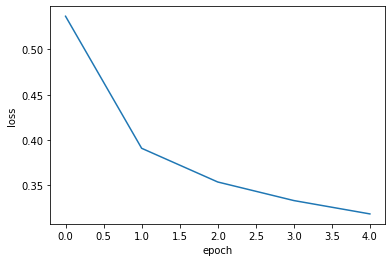

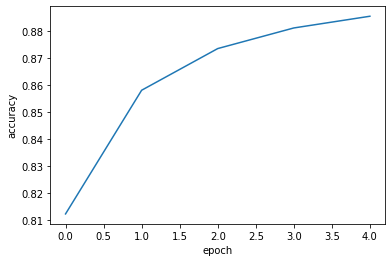

In [2]:
# fit() 메서드의 결과 history 변수에 담기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)  # 0 으로 지정해 훈련과정 나타내지않음

print(history.history.keys()) # 딕셔너리에 에포크마다 계산한 값이 순서대로 나열된 리스트가 들어가있음.

# 손실 그래프
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 정확도 그래프
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

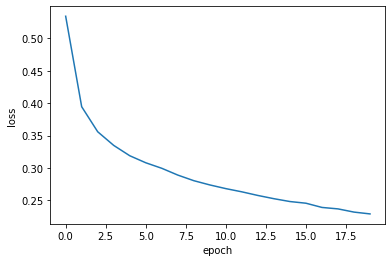

In [ ]:
# epoch 20
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### 검증 손실
* 손실을 사용하여 과대/과소적합 다룸
* 인공 신경망 모델에서는 정확도가 아닌 손실 함수를 최적화함

In [3]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))  # 검증

print(history.history.keys())  # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


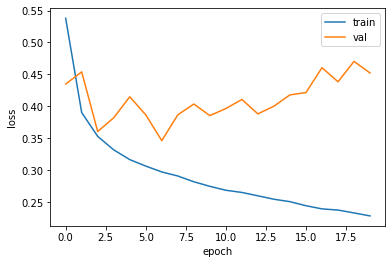

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

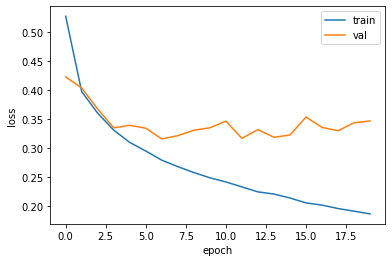

In [ ]:
# Adam
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

### 드롭아웃
* 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서(뉴런의 출력을 0으로) 과대적합을 막음.


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


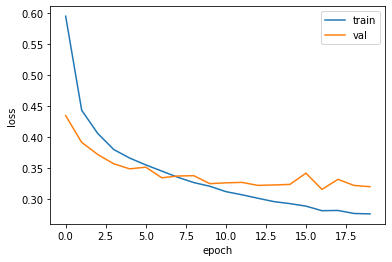

In [5]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 손실 확인
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 모델 저장과 복원
* 이전 모델에서는 epoch가 20이라 과대적합됨.
* 10으로 줄이고 재훈련
* save_weights() 메서드에 훈련된 모델의 파라미터를 저장
* save() 메서드로 모델 구조와 모델 파라미터를 함께 저장

In [7]:
# epoch
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [10]:
# 파라미터
model.save_weights('model-weights.h5')

# + 모델
model.save('model-whole.h5')

!ls -al *.h5

-rw-r--r-- 1 root root 332480 Jul  1 07:49 model-weights.h5
-rw-r--r-- 1 root root 981736 Jul  1 07:49 model-whole.h5


In [14]:
# 훈련하지 않은 새로운 모델에 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 정확도
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)  # predict는 compile 안하고도 가능
print(np.mean(val_labels == val_target))

# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

0.8828333333333334
375/375 [==============================] - 1s 1ms/step - loss: 0.3286 - accuracy: 0.8828


[0.3285512328147888, 0.8828333616256714]

### 콜백
* 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체
* fit() 메서드의 cllbacks 메개변수에 리스트로 전달하여 사용

In [15]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [16]:
# 모델 불러오기
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8866


[0.33216148614883423, 0.8865833282470703]

In [18]:
# 조기종료
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

11


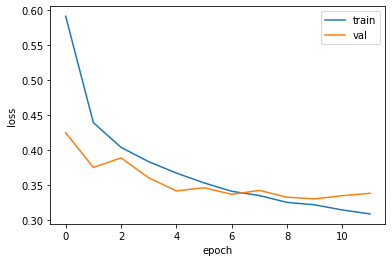

375/375 [==============================] - 1s 1ms/step - loss: 0.3306 - accuracy: 0.8831


[0.33061718940734863, 0.8830833435058594]

In [21]:
print(early_stopping_cb.stopped_epoch)

# 손실 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 검증세트로 성능 확인
model.evaluate(val_scaled, val_target)